## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0  1.423981  0.520784  0.417359 -0.937278 -1.392346 -0.296068
1  0.874208 -1.540827 -1.736694  1.353654  0.054333  0.729214
2  1.063916 -0.168281 -0.247805 -1.198959 -0.136518 -0.299043
3  0.422190 -1.040063  1.178284  0.591400  1.632382  0.912410
4  0.414083 -0.051386 -0.727429 -1.747387  1.059084 -0.355533


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0026438	total: 68ms	remaining: 1m 7s
1:	learn: 0.9941077	total: 68.5ms	remaining: 34.2s
2:	learn: 0.9847716	total: 69.2ms	remaining: 23s
3:	learn: 0.9749112	total: 69.7ms	remaining: 17.4s
4:	learn: 0.9670882	total: 70.3ms	remaining: 14s
5:	learn: 0.9588674	total: 70.8ms	remaining: 11.7s
6:	learn: 0.9508054	total: 71.3ms	remaining: 10.1s
7:	learn: 0.9423719	total: 71.9ms	remaining: 8.91s
8:	learn: 0.9340959	total: 72.4ms	remaining: 7.98s
9:	learn: 0.9258051	total: 73ms	remaining: 7.23s
10:	learn: 0.9176640	total: 73.5ms	remaining: 6.61s
11:	learn: 0.9100836	total: 74.1ms	remaining: 6.1s
12:	learn: 0.9035720	total: 74.6ms	remaining: 5.66s
13:	learn: 0.8959675	total: 75.1ms	remaining: 5.29s
14:	learn: 0.8887970	total: 75.6ms	remaining: 4.96s
15:	learn: 0.8815710	total: 76.1ms	remaining: 4.68s
16:	learn: 0.8740750	total: 76.5ms	remaining: 4.42s
17:	learn: 0.8676184	total: 77ms	remaining: 4.2s
18:	learn: 0.8618815	total: 77.4ms	remaining: 4s
19:	lea

93:	learn: 0.5088509	total: 110ms	remaining: 1.06s
94:	learn: 0.5056688	total: 110ms	remaining: 1.05s
95:	learn: 0.5023233	total: 111ms	remaining: 1.04s
96:	learn: 0.4989481	total: 111ms	remaining: 1.03s
97:	learn: 0.4958112	total: 112ms	remaining: 1.03s
98:	learn: 0.4931010	total: 112ms	remaining: 1.02s
99:	learn: 0.4899424	total: 112ms	remaining: 1.01s
100:	learn: 0.4872108	total: 113ms	remaining: 1s
101:	learn: 0.4836038	total: 113ms	remaining: 998ms
102:	learn: 0.4800853	total: 114ms	remaining: 991ms
103:	learn: 0.4765476	total: 114ms	remaining: 984ms
104:	learn: 0.4734037	total: 115ms	remaining: 979ms
105:	learn: 0.4702150	total: 115ms	remaining: 973ms
106:	learn: 0.4669171	total: 116ms	remaining: 967ms
107:	learn: 0.4642669	total: 116ms	remaining: 961ms
108:	learn: 0.4615393	total: 117ms	remaining: 955ms
109:	learn: 0.4582098	total: 117ms	remaining: 950ms
110:	learn: 0.4551595	total: 118ms	remaining: 944ms
111:	learn: 0.4527879	total: 118ms	remaining: 938ms
112:	learn: 0.4499426	

253:	learn: 0.1926139	total: 187ms	remaining: 549ms
254:	learn: 0.1915026	total: 188ms	remaining: 548ms
255:	learn: 0.1903873	total: 188ms	remaining: 547ms
256:	learn: 0.1894701	total: 189ms	remaining: 545ms
257:	learn: 0.1884073	total: 189ms	remaining: 544ms
258:	learn: 0.1870573	total: 190ms	remaining: 542ms
259:	learn: 0.1857976	total: 190ms	remaining: 541ms
260:	learn: 0.1849514	total: 190ms	remaining: 539ms
261:	learn: 0.1839671	total: 191ms	remaining: 537ms
262:	learn: 0.1828232	total: 191ms	remaining: 535ms
263:	learn: 0.1816720	total: 191ms	remaining: 534ms
264:	learn: 0.1806630	total: 192ms	remaining: 532ms
265:	learn: 0.1797067	total: 192ms	remaining: 531ms
266:	learn: 0.1788223	total: 193ms	remaining: 529ms
267:	learn: 0.1777286	total: 193ms	remaining: 527ms
268:	learn: 0.1768371	total: 193ms	remaining: 526ms
269:	learn: 0.1757872	total: 194ms	remaining: 524ms
270:	learn: 0.1750335	total: 194ms	remaining: 522ms
271:	learn: 0.1741543	total: 195ms	remaining: 521ms
272:	learn: 

475:	learn: 0.0573907	total: 293ms	remaining: 322ms
476:	learn: 0.0571101	total: 293ms	remaining: 322ms
477:	learn: 0.0568299	total: 294ms	remaining: 321ms
478:	learn: 0.0565664	total: 294ms	remaining: 320ms
479:	learn: 0.0563037	total: 295ms	remaining: 319ms
480:	learn: 0.0560457	total: 295ms	remaining: 319ms
481:	learn: 0.0557517	total: 296ms	remaining: 318ms
482:	learn: 0.0554534	total: 296ms	remaining: 317ms
483:	learn: 0.0552005	total: 297ms	remaining: 316ms
484:	learn: 0.0549549	total: 297ms	remaining: 316ms
485:	learn: 0.0546945	total: 298ms	remaining: 315ms
486:	learn: 0.0543541	total: 298ms	remaining: 314ms
487:	learn: 0.0541170	total: 299ms	remaining: 313ms
488:	learn: 0.0538767	total: 299ms	remaining: 313ms
489:	learn: 0.0535452	total: 300ms	remaining: 312ms
490:	learn: 0.0532826	total: 300ms	remaining: 311ms
491:	learn: 0.0529573	total: 300ms	remaining: 310ms
492:	learn: 0.0526257	total: 301ms	remaining: 309ms
493:	learn: 0.0523727	total: 301ms	remaining: 309ms
494:	learn: 

634:	learn: 0.0304999	total: 371ms	remaining: 213ms
635:	learn: 0.0304138	total: 371ms	remaining: 212ms
636:	learn: 0.0303256	total: 372ms	remaining: 212ms
637:	learn: 0.0302834	total: 372ms	remaining: 211ms
638:	learn: 0.0302248	total: 372ms	remaining: 210ms
639:	learn: 0.0301668	total: 373ms	remaining: 210ms
640:	learn: 0.0300829	total: 373ms	remaining: 209ms
641:	learn: 0.0299967	total: 374ms	remaining: 208ms
642:	learn: 0.0299552	total: 374ms	remaining: 208ms
643:	learn: 0.0298757	total: 375ms	remaining: 207ms
644:	learn: 0.0297677	total: 375ms	remaining: 207ms
645:	learn: 0.0297271	total: 376ms	remaining: 206ms
646:	learn: 0.0296708	total: 376ms	remaining: 205ms
647:	learn: 0.0295646	total: 377ms	remaining: 205ms
648:	learn: 0.0295090	total: 377ms	remaining: 204ms
649:	learn: 0.0294540	total: 378ms	remaining: 203ms
650:	learn: 0.0293883	total: 378ms	remaining: 203ms
651:	learn: 0.0293339	total: 378ms	remaining: 202ms
652:	learn: 0.0292334	total: 379ms	remaining: 201ms
653:	learn: 

852:	learn: 0.0161372	total: 477ms	remaining: 82.2ms
853:	learn: 0.0161039	total: 477ms	remaining: 81.6ms
854:	learn: 0.0160568	total: 478ms	remaining: 81ms
855:	learn: 0.0159816	total: 478ms	remaining: 80.4ms
856:	learn: 0.0159581	total: 479ms	remaining: 79.9ms
857:	learn: 0.0159351	total: 479ms	remaining: 79.3ms
858:	learn: 0.0158819	total: 479ms	remaining: 78.7ms
859:	learn: 0.0158509	total: 480ms	remaining: 78.1ms
860:	learn: 0.0158287	total: 480ms	remaining: 77.6ms
861:	learn: 0.0157559	total: 481ms	remaining: 77ms
862:	learn: 0.0157259	total: 481ms	remaining: 76.4ms
863:	learn: 0.0156742	total: 482ms	remaining: 75.8ms
864:	learn: 0.0156104	total: 482ms	remaining: 75.2ms
865:	learn: 0.0155808	total: 483ms	remaining: 74.7ms
866:	learn: 0.0155364	total: 483ms	remaining: 74.1ms
867:	learn: 0.0154743	total: 483ms	remaining: 73.5ms
868:	learn: 0.0154242	total: 484ms	remaining: 73ms
869:	learn: 0.0153657	total: 484ms	remaining: 72.4ms
870:	learn: 0.0153247	total: 485ms	remaining: 71.8ms

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

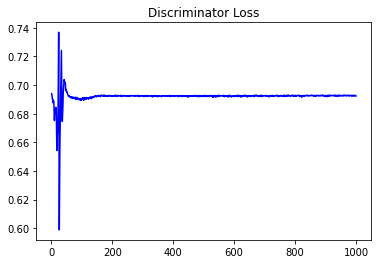

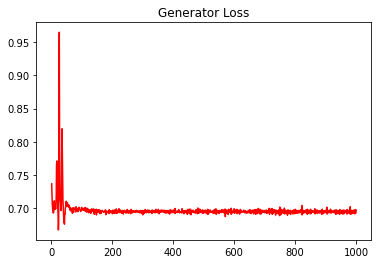

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.10831209834897915


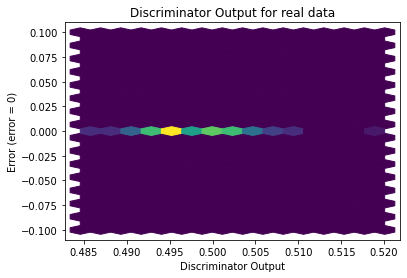

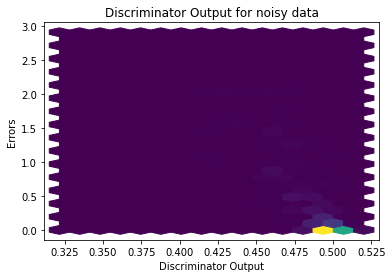

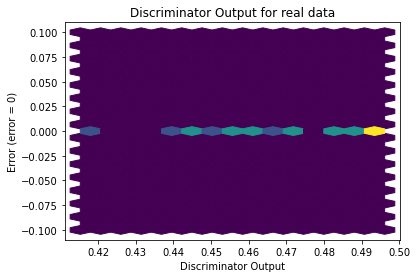

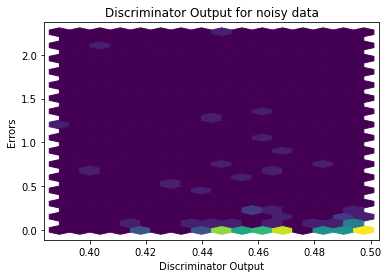

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


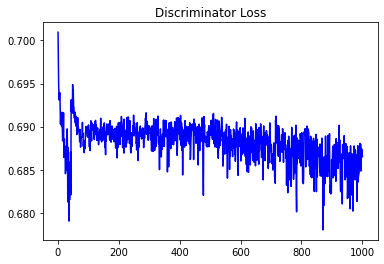

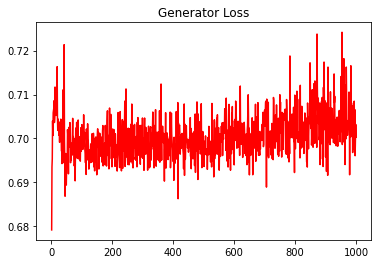

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.05185770850642745


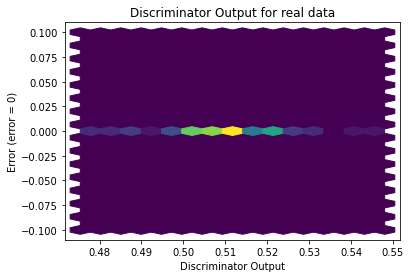

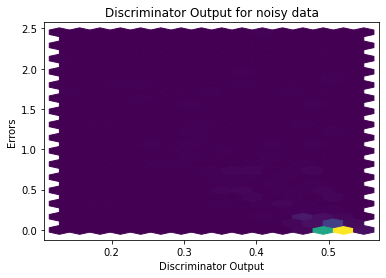

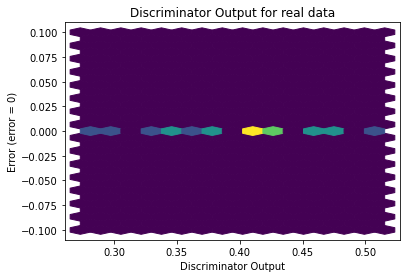

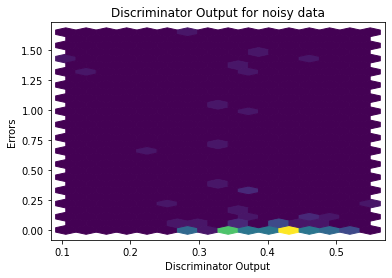

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1998]], requires_grad=True)
